#  Принятие решений в бизнесе. Приоритизация гипотез. Запуск и оценка результатов А/B-теста.

# Задача проекта: 

Приоритизация гипотез для увеличения выручки крупного интернет-магазина, запуск A/B-теста и его анализ.

# План работы.

1. Изучение данных

2. Предобработка данных.

3. Приоритизация гипотез.

- Применение фреймворка ICE для приоритизации гипотез. Сортировка их по убыванию приоритета.
- Применение фреймворка RICE для приоритизации гипотез. Сортировка их по убыванию приоритета.
- Анализ изменения приоритизации гипотез при применении RICE вместо ICE. 

4. Анализ A/B-теста

- Построение графика кумулятивной выручки по группам. Выводы и предположения.
- Построение графика кумулятивного среднего чека по группам. Выводы и предположения.
- Построение графика относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения.
- Построение графика кумулятивной конверсии по группам. Выводы и предположения.
- Построение графика относительного изменения кумулятивной конверсии группы B к группе A. Выводы и предположения.
- Построение точечного графика количества заказов по пользователям. Выводы и предположения.
- Расчет 95-й и 99-й перцентили количества заказов на пользователя. Определение границы для определения аномальных пользователей.
- Построение точечного графика стоимостей заказов. Выводы и предположения.
- Расчет 95-й и 99-й перцентили стоимости заказов. Выбор границы для определения аномальных заказов.
- Расчет статистической значимости различий в конверсии между группами по «сырым» данным. Выводы и предположения.
- Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.
- Расчет статистической значимости различий в конверсии между группами по «очищенным» данным. Выводы и предположения.
- Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.
- Принятие решения по результатам теста. Общие выводы.


# Описание данных.

 - Файл /datasets/hypothesis.csv. 



Hypothesis — краткое описание гипотезы;


Reach — охват пользователей по 10-балльной шкале;


Impact — влияние на пользователей по 10-балльной шкале;


Confidence — уверенность в гипотезе по 10-балльной шкале;


Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.






- Файл /datasets/orders.csv. 

transactionId — идентификатор заказа;


visitorId — идентификатор пользователя, совершившего заказ;


date — дата, когда был совершён заказ;


revenue — выручка заказа;


group — группа A/B-теста, в которую попал заказ.







- Файл /datasets/visitors.csv. 


date — дата;


group — группа A/B-теста;


visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Изучение даных

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# изучим датасет 
hypothesis = pd.read_csv('/datasets/.........csv')
display(hypothesis)
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. Пропусков и проблем с типами данных нет. При предобработке следует откорректировать названия полей.

In [3]:
# изучим датасет orders

orders = pd.read_csv('/datasets/......csv')
display(orders.head())
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В датасете имеем информацию по 1197 заказам. Пропусков нет. При предобработке следует произвести коррекцию названия полей и изменить тип данных поля 'date' с типа object на datetime.



In [4]:
# изучим датасет  visitors
visitors = pd.read_csv('/datasets/........csv')
display(visitors)
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В датасет попадают данные о посетителях за период с 01 по 31 августа. 62 строки, пропусков нет. При предобработке следует привети тип данных поля 'date' на datetime.

### Предобработка данных.

In [5]:
# коррекция названия полей в датасете 'hypothesis' и проверка результата
hypothesis.columns = hypothesis.columns.str.lower()
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [6]:
# коррекция названия полей и изменение типа данных в датасете 'orders', проверка результата

orders.columns = orders.columns.str.lower()
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
display(orders.head())
orders.info()


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [7]:
# изменение типа данных в датасете 'visitors', проверка результата
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Приоритизация гипотез.

#### Применение фреймворка ICE для приоритизации гипотез. Сортировка их по убыванию приоритета.

In [8]:
# расчет и добавление в таблицу ICE для каждой гипотезы, сортировка по убыванию

hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values('ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


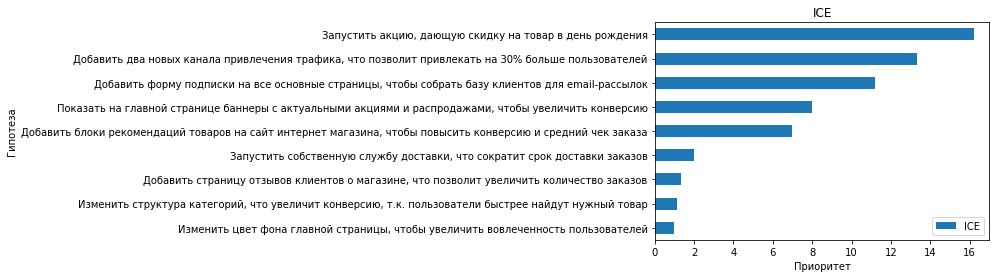

In [9]:
ax = hypothesis[['hypothesis', 'ICE']].set_index('hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()


#### Применение фреймворка RICE для приоритизации гипотез. Сортировка их по убыванию приоритета.

In [10]:
# расчет и добавление в таблицу RICE для каждой гипотезы, сортировка по убыванию приоритета по RICE
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values('RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


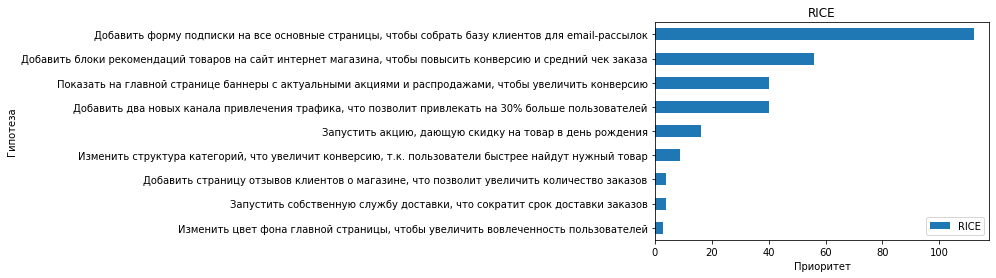

In [11]:
ax = hypothesis[['hypothesis', 'RICE']].set_index('hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

#### Вывод. Анализ изменения приоритизации гипотез при применении RICE вместо ICE.



При применении фреймворка ICE для приоретизации гипотез наибольшую оценку имеют гипиотезы 8,0 и 7. После применения фреймворка RICE приоритеты изменились на гипиотезы 7,2 и 0. Причиной таких изменений является то, что в случае применения фреймворка ICE в отличие от RICE мы не учитывали охват изменений, тогда как это является важной составляющей оценки гипотез. 

Таким образом,  наиболее приоритетными гипотезами будут 7, 2, 0.
Особенно выделяется гипотеза 7, т.к. помимо высоких impact (насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта) и confidence (насколько мы уверены, что это изменение повлияет на пользователей именно так), она коснётся всех пользователей сайта, так как показатель reach равен 10.

### Анализ A/B-теста

Проверим, есть ли пользователи, которые попали одновременно в обе группы тестирования.

In [12]:
# считаем количество пользователей, попавших в обе группы при проведении теста
ab_same = orders.groupby('visitorid').agg({'group':'nunique'}).query('group>1').reset_index()
#len(list(set(orders.query('group=="A"').visitorid) & set(orders.query('group=="B"').visitorid)))
print(ab_same.count())

visitorid    58
group        58
dtype: int64


Да, такие пользователи присутствуют в количестве 58-ми. Это небольшой процент от общего количества пользователей (5 %). Удалим их для чистоты эксперимента.

In [13]:
# уберем из дальнейшего анализа обнаруженные пересечения в группах
orders = orders[orders['visitorid'].isin(ab_same['visitorid']) == False]

#### Построение графика кумулятивной выручки по группам. 

In [14]:
# cоздаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

# собираем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[(orders['date'] <= x['date']) & (orders['group'] == x['group'])]
                        .agg({'date':'max', 'group':'max', 'transactionid':pd.Series.nunique, 'visitorid':pd.Series.nunique, 'revenue':'sum'}), axis=1)
                    .sort_values(by=['date','group']) 
                   )
display(ordersAggregated.head(10))

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
383,2019-08-03,B,54,53,288850
499,2019-08-04,A,77,71,388030
498,2019-08-04,B,68,66,385740
719,2019-08-05,A,99,92,474413
699,2019-08-05,B,89,87,475648


In [15]:
# собираем агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[(visitors['date'] <= x['date']) & (visitors['group'] == x['group'])]
                          .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )
display(visitorsAggregated.head(10))

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
383,2019-08-03,B,1803
499,2019-08-04,A,2562
498,2019-08-04,B,2573
719,2019-08-05,A,3318
699,2019-08-05,B,3280


In [16]:
# объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(10)) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
5,2019-08-03,B,54,53,288850,1803
6,2019-08-04,A,77,71,388030,2562
7,2019-08-04,B,68,66,385740,2573
8,2019-08-05,A,99,92,474413,3318
9,2019-08-05,B,89,87,475648,3280


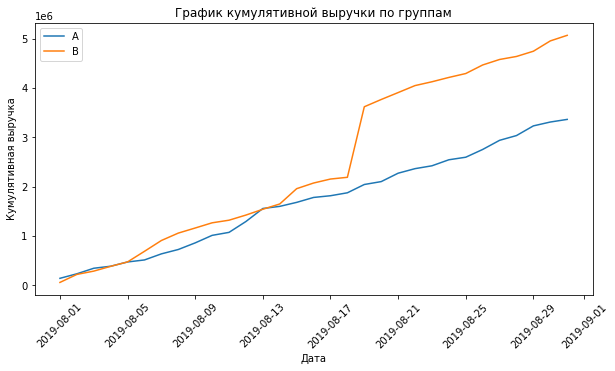

In [17]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel("Кумулятивная выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

#### Вывод

- В группе А выручка равномерно увеличивается на протяжении всего теста.
- В группе В выручка также показывает рост. И с середины проведения теста дает резкое увеличение, и затем снова плавный рост. Это может быть связано с тем, что при проведении теста был всплекск стоимости либо количества заказов в группе В. Разберемся позже.
- За все время проведения теста выручка в группе В выше, чем в группе А, за исключением первых пяти дней.

#### Построение графика кумулятивного среднего чека по группам. 

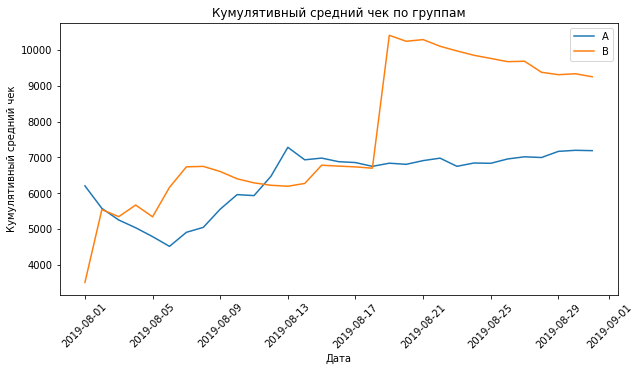

In [18]:
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.xticks(rotation=45)
plt.legend() 
plt.show()

#### Вывод

- Средний чек в группе А снижается в первые пять дней, затем идет на увеличение и к середине теста выравнивается.
- Средний чек в группе В постепенно растет с первого дня проведения теста, но с 20-го дня наблюдается резкий скачек на увеличение и затем постепенное плавное снижение (незначительное). Это могло быть связано с аномалиями (проведение нескольких покупок с высокой стоимостью). Проверим в дальнейшем аномалии. 

#### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A. 

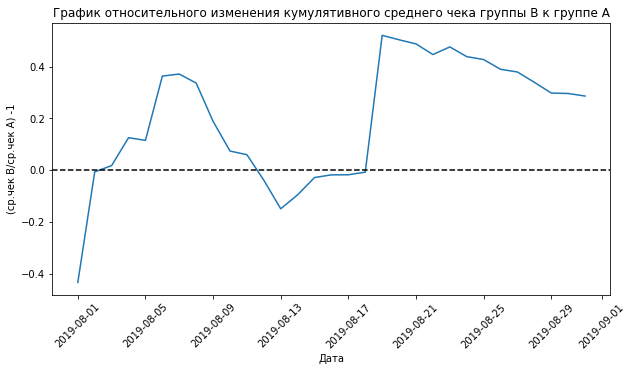

In [19]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('(ср.чек В/ср.чек А) -1')
plt.xticks(rotation=45)
plt.show()

#### Вывод

Наблюдаем на графике относительного изменения кумулятивного среднего чека группы B к группе A резкие изменения на повышение и понижение показателей в середине проведения теста. Есть предположения о наличии аномалий (выбросов). Поработаем в дальнейшем с этим.



#### Построение графика кумулятивной конверсии по группам. 

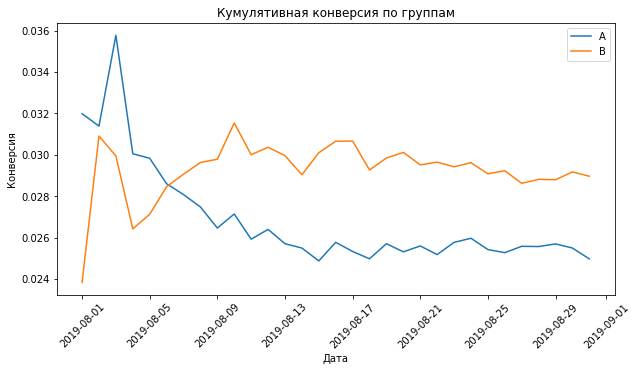

In [20]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики

plt.figure(figsize=(10,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xticks(rotation=45)
plt.show()




#### Вывод.

- Кумулятивная конверсия группы А первые дни проведения теста имела резкий краткосрочный рост и в течение 1-2 дней пошла на резкое снижение, которое стабилизировалось на восьмой-десятый день.
- Кумулятивная конверсия группы В в первые два дня имела скачек на повышение показателя, затем резкое снижение на 4-й день проведения теста, после чего конверсия с 10-го дня стабилизировалась.
- Кумулятивная конверсия группы В с пятого дня проведения теста стабильно выше конверсии группы А.
- Скачки в показателях кумулятивной конверсии в первые дни проведения теста могут быть связаны с аномалиями. Проверим в дальнейшем.

#### Построение графика относительного изменения кумулятивной конверсии группы B к группе A. 

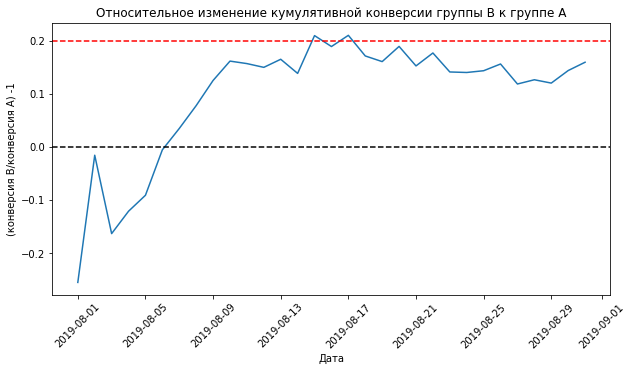

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='red', linestyle='--')

plt.title('Относительное изменение кумулятивной конверсии группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('(конверсия В/конверсия А) -1')
plt.xticks(rotation=45)
plt.show()

#### Вывод.

Из графика относительного различия конверсии группы В к группе А видим, что с 3-го дня после начала проведения теста группа В лидирует по кумулятивной конверсии и зафиксировалась около прироста в 15 % относительно группы А. 

#### Построение точечного графика количества заказов по пользователям. 

      visitorid  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2

count    973.000000
mean       1.044193
std        0.238090
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: orders, dtype: float64


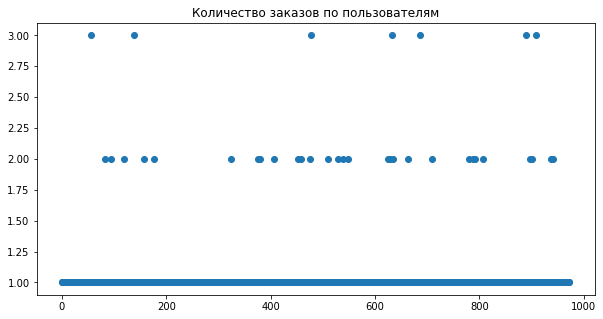

In [22]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsers.columns = ['visitorid','orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
print()
print(ordersByUsers['orders'].describe())

plt.figure(figsize=(10,5))
plt.title('Количество заказов по пользователям')

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.show()

#### Вывод.

Видим преобладание заказов по пользователям в количестве одного-двух. Есть пользователи с заказами в количестве 10-11, но их мало, исходя из графика, и для понимания того, считать это выбросами или нет, определим их долю.

#### Расчет 95-й и 99-й перцентили количества заказов на пользователя. Определение границы для определения аномальных пользователей.

In [23]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 1. 2.]


#### Вывод

Не более 5 % пользователей совершали покупки более 1-го раза, и не более 1 % пользователей - более 2-х заказов. Исходя из расчета перцентилей определим верхнюю границу в 2 заказа на одного пользователя.

#### Построение точечного графика стоимостей заказов. 

      transactionid   visitorid       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A
949      1347999392   887908475 2019-08-21    60450     A
940      2420050534  4003628586 2019-08-08    58550     B
131      3163614039  2254586615 2019-08-22    53904     A


count    1.016000e+03
mean     8.300815e+03
std      4.212199e+04
min      5.000000e+01
25%      1.190000e+03
50%      2.955000e+03
75%      8.134250e+03
max      1.294500e+06
Name: revenue, dtype: float64

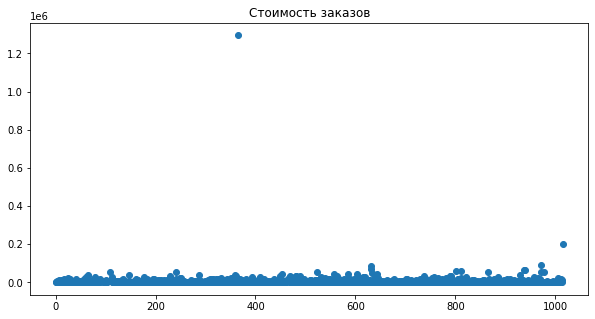

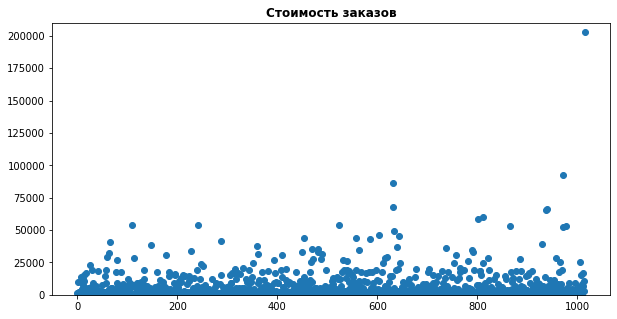

In [24]:
print(orders.sort_values(by='revenue', ascending=False).head(10))
display(orders['revenue'].describe())

plt.figure(figsize=(10,5))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов')
plt.show()

plt.figure(figsize=(10,5))
plt.ylim(0, 210000)
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов', fontsize=12, fontweight='bold')
plt.show()

#### Вывод.

На графике видим два очень крупных заказа: один на 1294500 у.е., второй выбивающийся заказ на сумму 202740 у.е. Эти заказы могут существенно влиять на результаты теста. Для уточнения нужно определить верхнюю границу заказа.

#### Расчет 95-й и 99-й перцентили стоимости заказов. Выбор границы для определения аномальных заказов.

In [25]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[17990. 26785. 53904.]


#### Вывод.

Не более 10% пользователей совершали заказы на сумму больше 17 990 у.е., не более 5 % пользователей - на сумму не превышающую 26 785 у.е. Исходя из расчета перцентилей, определим верхнюю границу стоимости заказов для анализа теста в 27 000 у.е.

#### Расчет статистической значимости различий в конверсии между группами по «сырым» данным.

In [26]:
# Подготовим датафрейм с фактическими и кумулятивными данными по дням:

visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = (visitorsADaily
                        .apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                               .agg({'date':'max', 'visitorsPerDateA':'sum'}), axis=1)
                       )
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = (visitorsBDaily
                        .apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                               .agg({'date':'max', 'visitorsPerDateB':'sum'}), axis=1)
                       )
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (orders[orders['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transactionid':pd.Series.nunique, 'revenue':'sum'})
               )
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = (ordersADaily
                      .apply(lambda x:ordersADaily[ordersADaily['date'] <= x['date']]
                             .agg({
                                    'date':'max',
                                    'ordersPerDateA':'sum',
                                    'revenuePerDateA':'sum'}), axis=1)
                      .sort_values(by=['date'])
                     )
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = (orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transactionid':pd.Series.nunique, 'revenue':'sum'})
               )
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = (ordersBDaily
                      .apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
                             .agg({
                                    'date':'max',
                                    'ordersPerDateB':'sum',
                                    'revenuePerDateB' : 'sum'}), axis=1)
                      .sort_values(by=['date'])
                     )
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = (ordersADaily
        .merge(ordersBDaily, left_on='date', right_on='date', how='left')
        .merge(ordersACummulative, left_on='date', right_on='date', how='left')
        .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsADaily, left_on='date', right_on='date', how='left')
        .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
        .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
       )

data.head(10)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280
5,2019-08-06,15,40919,23,214842,114,515332,112,690490,667,655,3985,3935
6,2019-08-07,16,123248,23,219164,130,638580,135,909654,644,709,4629,4644
7,2019-08-08,14,88639,22,150141,144,727219,157,1059795,610,654,5239,5298
8,2019-08-09,11,134237,19,103166,155,861456,176,1162961,617,610,5856,5908
9,2019-08-10,15,152275,22,105162,170,1013731,198,1268123,406,369,6262,6277


In [27]:
# создаем для каждой группы датафрейм с количеством заказов на пользователя

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid':pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid':pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'orders'] 

In [28]:
# создаем списки с числом заказов каждого пользователя, в том числе ноль

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Формулируем гипотезы:

- H0 - нет различий между группами А и В
- H1 -есть различия между группами А и В

In [29]:
# Функция для проверки гипотезы о равенстве групп A и B
def stat_sig(dataA, dataB):
    # нулевая гипотеза H0: между группами dataA и dataB нет статистически значимой разницы
    alpha = 0.05
    p_value = stats.mannwhitneyu(dataA, dataB)[1]

    print("P-value: {0:.3f}".format(p_value))

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами по 'сырым' данным есть разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")
    
    print("Относительный прирост показателя группы В к группе А: {0:.2%}".format(dataB.mean()/dataA.mean()-1))
    

In [30]:
stat_sig(sampleA, sampleB)

P-value: 0.011
Отвергаем нулевую гипотезу: между группами по 'сырым' данным есть разница
Относительный прирост показателя группы В к группе А: 15.98%


#### Вывод.

 При анализе не очищенных от выбросов данных между конверсиями групп А и В есть статистически значимая разница. 
Относительный прирост конверсии группы В к группе А равен 15,98 %.

#### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

In [31]:
stat_sig(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

P-value: 0.829
Не получилось отвергнуть нулевую гипотезу
Относительный прирост показателя группы В к группе А: 28.66%


#### Вывод.

Мы не смогли опровергнуть нулевую гипотезу, а это значит, что средний чек группы В по "не очищенным" ("сырым") данным не отличается от среднего чека группы А по тем же "сырым" данным. При этом прирост среднего чека группы В относительно группы А равен 28,66 %, однако данное различие не является статистически значимым.


#### Расчет статистической значимости различий в конверсии между группами по «очищенным» данным.

In [32]:
# выделим в данных "аномальные" показатели (пользователей совершивших более 3-х заказов и сумма заказа которых > 28000)

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorid'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorid']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 27000]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(10))
print()
print('\033[1m', 'Количество "аномальных" пользователей:', abnormalUsers.shape[0]) 

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
648     382846391
58      611059232
751     689129267
1137    759473111
77      787824685
Name: visitorid, dtype: int64

 Количество "аномальных" пользователей: 58


In [33]:
# cоздаем списки с числом заказов каждого пользователя с очищенными данными (нули включаем)

sampleAFiltered = pd.concat([ordersByUsersA[~(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[~(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)


In [34]:
stat_sig(sampleAFiltered, sampleBFiltered)

P-value: 0.012
Отвергаем нулевую гипотезу: между группами по 'сырым' данным есть разница
Относительный прирост показателя группы В к группе А: 18.19%


#### Вывод.

При анализе очищенных данных между конверсиями групп А и В есть статистически значимая разница. Что не отличается от выводов с "сырыми" данными анализа конверсии по группам. Относительный прирост конверсии группы В к группе А равен 18,19 % (по сравнению с не очищенными данными наблюдаем увеличение на 2%).



#### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. 

In [35]:
stat_sig(orders[(orders['group']=='A') & ~(orders['visitorid'].isin(abnormalUsers))]['revenue'],orders[(orders['group']=='B') & ~(orders['visitorid'].isin(abnormalUsers))]['revenue'])


P-value: 0.646
Не получилось отвергнуть нулевую гипотезу
Относительный прирост показателя группы В к группе А: -4.85%


#### Вывод

При анализе "очищенных" данных  не получилось отвергнуть нулевую гипотезу, как и при анализе "сырых" данных. А это означает , что нет оснований утверждать, что средний чек группы В отличается от среднего чека группы А. По очищенным данным прирост среднего чека группы В относительно А  - отрицательный и равен - 4,85 %.

### Общий вывод.

Выборка данных имеет корректный размер и проблема подглядывания в результате сравнения групп во время проведения теста была исключена.
Кумулятивные метрики по выручке, среднему чеку и конверсии на протяжении анализа теста лидировали в группе B. 

Были предположения, что это лидирование искажено аномальными данными, которые мы исключили. И как показал анализ, аномальные данные не повлияли на результат теста, так как и по "сырым" и по очищенным от выбросов данным между КОНВЕРСИЯМИ групп А и В есть статистически значимая разница. Конверсия группы В выше, чем в А, примерно на 16-18 %.

 А вот после очистки данных разница между средними чеками групп стала минимальна, но это не приводит к сомнениям в проведении теста и его результатах. По "сырым" и по очищенным данным нет оснований считать, что средний чек группы В отличается от среднего чека группы А.

График относительного изменения кумулятивной конверсии группы B к группе A показывает, что результаты группы В стабильно лучше группы А.
Следовательно, на основании проведенного анализа А/В теста, разница показателей конверсии до и после очистки данных является статистически значимой, что является основанием следующего решения: А/В тест следует остановить и признать его успешным - фиксируем победу группы В. 





